<a href="https://colab.research.google.com/github/not-Bartek/Handwritten-Digit-Classification/blob/main/MNIST_digit_clasification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwirtten Digit Clasification using Deep Learning (Neural Network)**

Importing the Dependencies

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data(path='mnist.npz')

In [10]:
type(X_train)

numpy.ndarray

In [13]:
X_train.shape, X_test.shape, Y_test.shape, Y_train.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (60000,))

Training data = 60,000 images

Test data = 10,000 images

Image dimension -> 28x28

Grayscale Image -> 1 channel

In [14]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

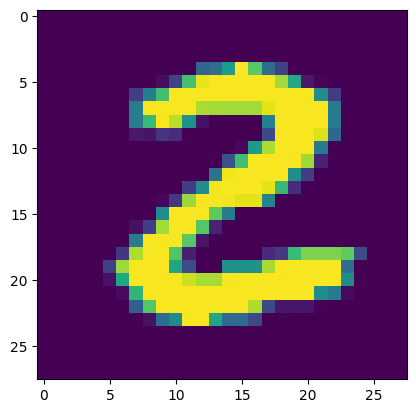

2


In [23]:
#displaying the image
plt.imshow(X_train[25])
plt.show()

#print the correspodning label
print(Y_train[25])

Image Labels

In [26]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images

0/255 = 0
255/255 = 1

In [27]:
#scalling the values

X_train = X_train/255
X_test = X_test/255

Building the Neural Network

In [69]:
#setting up the layers of the Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [70]:
#compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
history = model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3035 - accuracy: 0.9131
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1399 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1033 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0840 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0697 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0472 - accuracy: 0.9845
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9862
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.036

Training data accuracy = 98,8%

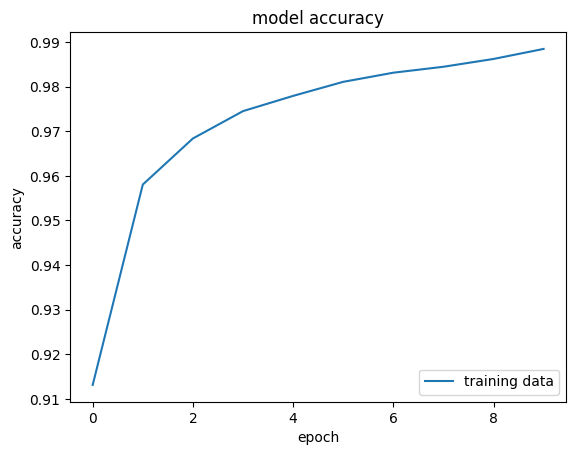

In [72]:
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data'], loc='lower right')

**Accuracy on Test data**

In [73]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0954 - accuracy: 0.9736
0.9735999703407288


Test data accuracy = 96.2%

In [74]:
print(X_test.shape)

(10000, 28, 28)


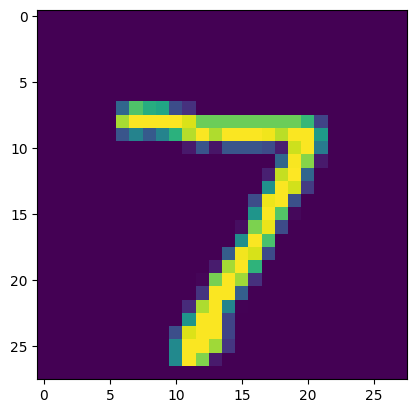

In [75]:
plt.imshow(X_test[0])
plt.show()

In [76]:
print(Y_test[0])

7


In [77]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [78]:
print(Y_pred.shape)

(10000, 10)


In [79]:
print(Y_pred[0])

[1.5468216e-03 5.2245051e-02 4.0524098e-01 9.6274620e-01 6.3917636e-09
 6.8681091e-03 2.1729634e-09 9.9998337e-01 5.1615909e-02 2.1602361e-01]


model.predict() gives the probability of each class for that data point

In [80]:
#converting the prediction probabilities to class label

label_for_first_image = np.argmax(Y_pred[0])

In [81]:
print(label_for_first_image, Y_pred[0][label_for_first_image]*100,'%')

7 99.99833703041077 %


In [82]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test -> true labels

Y_pred_labels -> predicted labels

Confusion Matrix

In [83]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [84]:
print(conf_mat)

tf.Tensor(
[[ 969    0    2    2    1    1    0    1    2    2]
 [   0 1123    1    3    0    0    1    2    5    0]
 [   6    0 1004    4    2    1    2    5    8    0]
 [   1    0    3  964    0   22    0    6    7    7]
 [   2    0    4    0  959    1    2    2    2   10]
 [   2    0    0    8    1  868    3    1    7    2]
 [   7    2    0    1    5    9  930    1    3    0]
 [   1    4   12    4    0    2    0  992    4    9]
 [   5    1    2    2    2    6    0    3  949    4]
 [   2    2    0    1    8    6    1    6    6  977]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

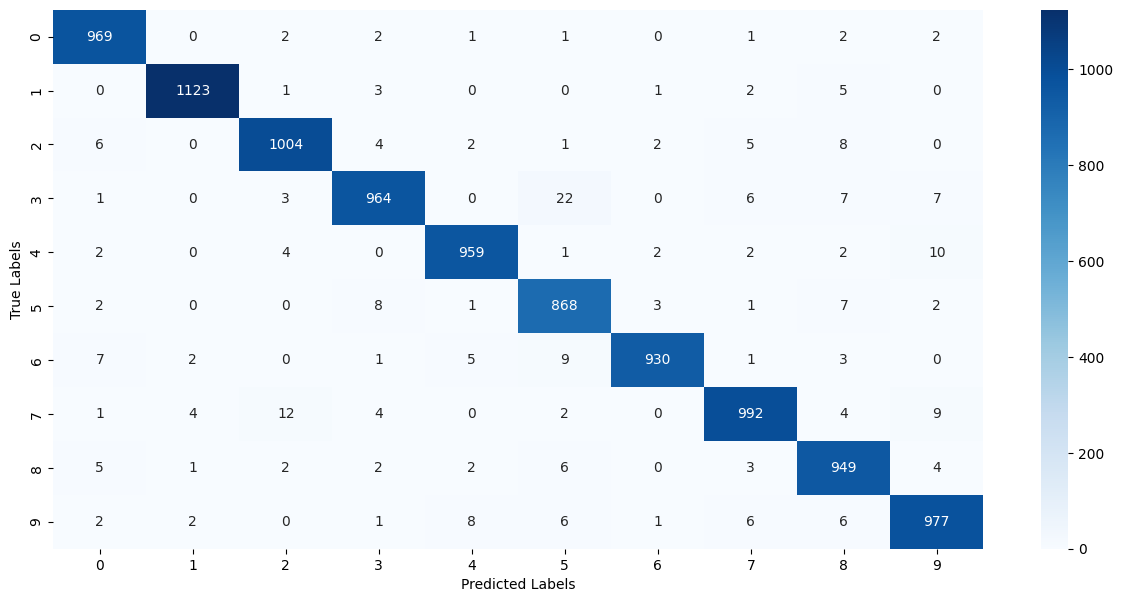

In [85]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='d')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building the predictive system

In [93]:
input_image_path = 'number.png'
input_image = cv2.imread(input_image_path)
type(input_image)

numpy.ndarray

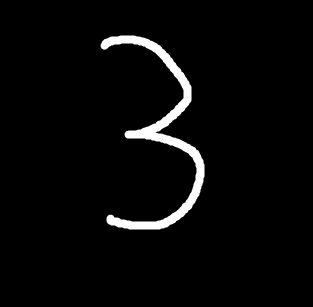

In [94]:
cv2_imshow(input_image)

In [95]:
input_image.shape

(307, 313, 3)

In [96]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [97]:
grayscale.shape

(307, 313)

In [98]:
input_image_resized = cv2.resize(grayscale, (28,28))

In [99]:
input_image_resized.shape

(28, 28)

In [101]:
cv2_imshow(input_image_resized)

In [102]:
input_image_resized = input_image_resized / 255

image_reshaped = np.reshape(input_image_resized, [1, 28, 28])

In [103]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 48ms/step
[[3.02994600e-03 5.76489031e-01 6.31321013e-01 9.80977595e-01
  1.23235114e-01 2.25702673e-01 1.83019601e-03 2.76155889e-01
  7.25838763e-04 5.89906890e-03]]


In [104]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


Predictive System

Path of the image to be predicted: number.png


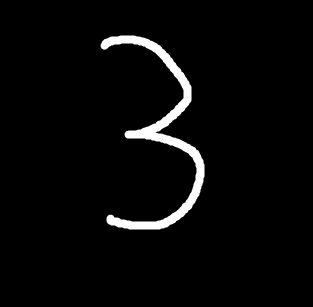

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  3 with the probability  98.1 %


In [107]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resized = cv2.resize(grayscale, (28,28))
input_image_resized = input_image_resized / 255
image_reshaped = np.reshape(input_image_resized, [1, 28, 28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ',input_pred_label,'with the probability ', np.round(input_prediction[0][input_pred_label]*100, 2), '%')